###### 8

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [32]:
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(1)
X = np.random.randn(100)
err = np.random.randn(100)
Y = 1 + 2*X + 3*X**2 + 4 * X ** 3 +err

sample_data = pd.DataFrame({"Y":Y, "X1":X, "X2":X**2, "X3":X**3, "X4":X**4, "X5":X**5, "X6":X**6, "X7":X**7, "X8":X**8, "X9":X**9, "X10":X**10})

In [33]:
sample_data.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,28.860383,1.624345,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,127.874436
1,1.207943,-0.611756,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,0.007342
2,0.594678,-0.528172,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,0.001689
3,-2.039644,-1.072969,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415
4,6.475215,0.865408,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,0.235617


In [34]:
from sklearn.linear_model import LinearRegression
from itertools import combinations

lr = LinearRegression()
mallowscp = []
bic = []
adjusted_r_squared = []
X_model = sample_data.iloc[:,1:]
Y = sample_data['Y']

# Estimating sigma^2
lr.fit(X_model, Y)
yhat = lr.predict(X_model)
sigma2 = np.sum((Y -yhat)**2)/len(X)

for i in range(1,11):
    current_cp = []
    current_bic = []
    current_r_squared = []
    for comb in combinations(range(10), i):
        lr.fit(X_model.iloc[:,list(comb)], Y) 
        yhat = lr.predict(X_model.iloc[:,list(comb)])
        SS_Residual = sum((Y-yhat)**2)       
        SS_Total = sum((Y-np.mean(Y))**2)     
        r_squared = 1 - (float(SS_Residual))/SS_Total
        adjusted_r_squared_num = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X_model.iloc[:,list(comb)].shape[1]-1)
        mallowscp_num= (SS_Residual + 2 * len(list(comb))* sigma2)/len(X)
        bic_num = (SS_Residual + len(list(comb))* sigma2*np.log(len(X)))
        current_r_squared.append(adjusted_r_squared_num)
        current_bic.append(bic_num)
        current_cp.append(mallowscp_num)
        
    mallowscp.append(min(current_cp))
    bic.append(min(current_bic))
    adjusted_r_squared.append(max(current_r_squared))
    
mallowscp.index(min(mallowscp)), bic.index(min(bic)), adjusted_r_squared.index(max(adjusted_r_squared))

(3, 3, 3)

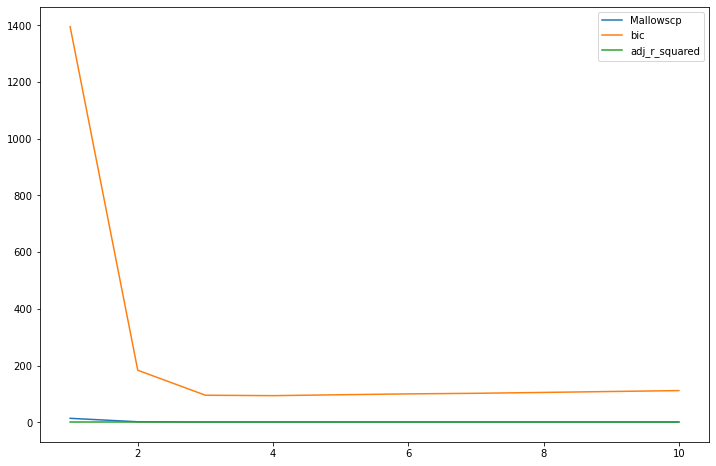

In [35]:
plt.figure(figsize = (12, 8))
plt.plot(range(1,11),mallowscp, label = 'Mallowscp')
plt.plot(range(1,11),bic, label = 'bic')
plt.plot(range(1,11), adjusted_r_squared, label = 'adj_r_squared')
plt.legend()

In [36]:
# Forward Selection

X_forward = pd.DataFrame()
index_covered = []
index_subsets = []
lr = LinearRegression()

for i in range(10):
    r_temp =[]
    index_table=[]
    for j in range(10):
        if j not in index_covered:
            X_temp = X_forward
            X_temp['col_temp'] = X_model.iloc[:,j:j+1]
            lr.fit(X_temp, Y)
            yhat = lr.predict(X_temp)
            SS_Residual = sum((Y-yhat)**2)       
            SS_Total = sum((Y-np.mean(Y))**2)     
            r_squared = 1 - (float(SS_Residual))/SS_Total
            r_temp.append(r_squared)
            index_table.append(j)
            

    index_covered.append(index_table[r_temp.index(min(r_temp))])
    index_subsets.append(list(index_covered))
    print('Indexes covered in order are',index_covered )
    X_forward['i'] = X_model.iloc[:,index_table[r_temp.index(min(r_temp))]]
print('Indexed subsets are:', index_subsets)

Indexes covered in order are [9]
Indexes covered in order are [9, 1]
Indexes covered in order are [9, 1, 3]
Indexes covered in order are [9, 1, 3, 5]
Indexes covered in order are [9, 1, 3, 5, 7]
Indexes covered in order are [9, 1, 3, 5, 7, 8]
Indexes covered in order are [9, 1, 3, 5, 7, 8, 0]
Indexes covered in order are [9, 1, 3, 5, 7, 8, 0, 6]
Indexes covered in order are [9, 1, 3, 5, 7, 8, 0, 6, 4]
Indexes covered in order are [9, 1, 3, 5, 7, 8, 0, 6, 4, 2]
Indexed subsets are: [[9], [9, 1], [9, 1, 3], [9, 1, 3, 5], [9, 1, 3, 5, 7], [9, 1, 3, 5, 7, 8], [9, 1, 3, 5, 7, 8, 0], [9, 1, 3, 5, 7, 8, 0, 6], [9, 1, 3, 5, 7, 8, 0, 6, 4], [9, 1, 3, 5, 7, 8, 0, 6, 4, 2]]


In [37]:
from sklearn.model_selection import train_test_split

X_model_train, X_model_test, Y_train, Y_test = train_test_split(X_model, Y, random_state = 1)
val_rsquared = []

for i in range(10):
    lr.fit(X_model_train.iloc[:,index_subsets[i]], Y_train)
    yhat = lr.predict(X_model_test.iloc[:,index_subsets[i]])
    SS_Residual = sum((Y_test - yhat)**2)
    SS_Total = sum((Y_test - np.mean(Y_test))**2)
    r_squared  = 1 - ((SS_Residual*(len(Y_test)-1))/(SS_Total*(len(Y_test)-len(index_subsets[i])-1)))
    val_rsquared.append(r_squared)
    
print("The adjusted rsquared for validated models are", val_rsquared)

The adjusted rsquared for validated models are [-0.444155071394021, -0.8388621003562708, -0.5233637006411171, -0.6055027726373607, -1.2669348244769663, -0.5927479600692593, 0.7568061697635594, 0.8895414175263399, 0.9409914364391527, 0.9302783099653205]


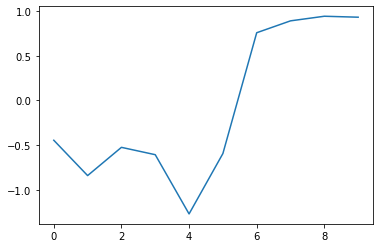

In [38]:
plt.plot(range(10), val_rsquared)

In [39]:
sample_data['Y_new'] = 1 + sample_data['X1']**7 + err
sample_data.head(10)

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y_new
0,28.860383,1.624345,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,1.278744e+02,30.389422
1,1.207943,-0.611756,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,7.341509e-03,2.192441
2,0.594678,-0.528172,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,1.689475e-03,1.392025
3,-2.039644,-1.072969,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415e+00,-0.043649
4,6.475215,0.865408,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,2.356173e-01,0.268622
5,-36.308196,-2.301539,5.297080,-12.191435,28.059060,-64.579013,148.631099,-342.080225,787.310875,-1812.026445,4.170449e+03,-340.910842
6,35.610681,1.744812,3.044368,5.311849,9.268177,16.171224,28.215743,49.231160,85.899106,149.877771,2.615085e+02,50.971716
7,-1.502089,-0.761207,0.579436,-0.441071,0.335746,-0.255572,0.194543,-0.148088,0.112725,-0.085807,6.531714e-02,-0.101788
8,1.807112,0.319039,0.101786,0.032474,0.010360,0.003305,0.001055,0.000336,0.000107,0.000034,1.092544e-05,0.734118
9,0.658402,-0.249370,0.062186,-0.015507,0.003867,-0.000964,0.000240,-0.000060,0.000015,-0.000004,9.299264e-07,1.032555


In [40]:

lr = LinearRegression()
mallowscp = []
bic = []
adjusted_r_squared = []
Y_new = sample_data['Y_new']



# Estimating sigma^2
lr.fit(X_model, Y_new)
yhat = lr.predict(X_model)
sigma2 = np.sum((Y_new -yhat)**2)/len(X)

for i in range(1,11):
    current_cp = []
    current_bic = []
    current_r_squared = []
    for comb in combinations(range(10), i):
        lr.fit(X_model.iloc[:,list(comb)], Y_new) 
        yhat = lr.predict(X_model.iloc[:,list(comb)])
        SS_Residual = sum((Y-yhat)**2)       
        SS_Total = sum((Y-np.mean(Y))**2)     
        r_squared = 1 - (float(SS_Residual))/SS_Total
        adjusted_r_squared_num = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X_model.iloc[:,list(comb)].shape[1]-1)
        mallowscp_num= (SS_Residual + 2 * len(list(comb))* sigma2)/len(X)
        bic_num = (SS_Residual + len(list(comb))* sigma2*np.log(len(X)))
        current_r_squared.append(adjusted_r_squared_num)
        current_bic.append(bic_num)
        current_cp.append(mallowscp_num)
        
    mallowscp.append(min(current_cp))
    bic.append(min(current_bic))
    adjusted_r_squared.append(max(current_r_squared))
    
    
print("Mallow's cp", mallowscp)    
mallowscp.index(min(mallowscp)), bic.index(min(bic)), adjusted_r_squared.index(max(adjusted_r_squared))

Mallow's cp [235.9709941137251, 307.6971838838159, 447.48934188917724, 630.615980422839, 804.7050318502983, 1003.108364143042, 1640.9307216744608, 1716.421237903012, 1718.6485266753398, 1718.703321906314]


(0, 0, 0)

/Users/sriramnatarajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.878535129787622, tolerance: 0.2582343371328803
  model = cd_fast.enet_coordinate_descent(


5
[1.076867994210621, 1.0876119821484875, 1.079313052935954, 1.07307329821002, 1.0689987506006287, 1.0670904684715274, 1.0693462853400346, 1.074354055007905, 1.0812656609020528, 1.0899010720957394, 1.0964179420451448, 1.1012820422684535, 1.1030350175744186, 1.1036758803761904, 1.1043204677264413, 1.1049686784187576, 1.1078494075716936, 1.1080028318972583, 1.1081564787741065, 1.1083103475012683, 1.1084644764083753, 1.1086301257409321, 1.1102466481796225, 1.110290748683104, 1.1103366374511061, 1.1103831348633686, 1.1104299945694691, 1.1104770344197115, 1.1105243499337083, 1.1105718690287614, 1.110619659477667, 1.1106682007528976, 1.1107182353361091, 1.1107736847001999, 1.1108458206044345, 1.1108727726697474, 1.1109089998735582, 1.1109508636559715, 1.110995608655068, 1.111041852637129, 1.111088870932006, 1.111136406424052, 1.1111842470428506, 1.1112323382936216, 1.1112805994664416, 1.1113290121889374, 1.111377541196448, 1.111426180967169, 1.1114749174038365, 1.1115237437612409, 1.11157265

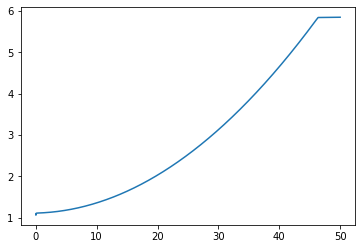

In [41]:
from sklearn.linear_model import Lasso

alphas = np.linspace(.001, 50, 10000)
errors = []


X_model_train, X_model_test, Y_train, Y_test = train_test_split(X_model, Y_new, random_state = 1)

for alpha in alphas:
    ls = Lasso(alpha = alpha,  max_iter = 100000, tol = .000001)
    ls.fit(X_model_train, Y_train)
    errors.append(np.mean((Y_test -ls.predict(X_model_test))**2))

plt.plot(alphas, errors)
print(np.argmin(errors))
print(errors)

In [42]:
ls = Lasso(alpha = alphas[13],  max_iter = 100000, tol = .000001)

ls.fit(X_model_train, Y_train)
ls.coef_

array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -1.50152857e-02,
        0.00000000e+00, -0.00000000e+00,  1.00191864e+00,  0.00000000e+00,
        3.80319033e-04,  4.27582457e-04])

###### 9

In [43]:
college = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/college.csv")
college['private'] = np.where((college['Private'] == 'Yes'), 1, 0)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,private
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [44]:
y = college['Apps']
x = college.drop(['Apps', 'Private'], axis = 1)


x_train, x_test, y_train, y_test = train_test_split(x,y)


In [45]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
errors = np.mean((lr.predict(x_test) - y_test)**2)
errors

1165821.7801299682

In [46]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

x_std = x.iloc[:,:-1].std()
x_std['private'] = 1
rcv = RidgeCV(alphas=np.linspace(.01, 100, 1000), cv=10)

ls_errors =[]
alphas = np.linspace(.01, 100, 1000)

x_std_train, x_std_test, y_train, y_test = train_test_split(x/x_std, y, random_state = 100)

for alpha in alphas:
    ls = Lasso(alpha = alpha, tol = .0001, max_iter =1000)
    ls.fit(x_std_train, y_train)
    ls_errors.append(np.mean((y_test-ls.predict(x_std_test))**2))
    

ls = Lasso(alpha = alphas[125], tol =.001, max_iter = 1000)
ls.fit(x_std_train, y_train)
ls.coef_
print(rcv.cv_values_)

AttributeError: 'RidgeCV' object has no attribute 'cv_values_'

In [ ]:
college['college'] = college.index
college.reset_index(drop = True)


###### 10

In [ ]:
np.random.seed(69)
x = np.random.rand(100)
example_data = pd.DataFrame()
resid = []

for i in range(20):
   example_data[f"x_{i}"] = x**(i+1)

example_data["y"] = example_data['x_1'] + 2 * example_data['x_2'] + 3 * example_data['x_3'] + 4 * example_data['x_4'] +  + 6 * example_data['x_6'] + 8 * example_data['x_8']
x_model = example_data.iloc[:,:-1]
y = example_data["y"]
linreg = LinearRegression()

x_model_train, x_model_test, y_train, y_test = train_test_split(x_model, y)


for i in range(1,11):
    errors = []
    for comb in combinations(range(10), i):
        linreg.fit(x_model_train.iloc[:,list(comb)], y_train)
        resid_temp = np.mean((linreg.predict(x_model_test.iloc[:,list(comb)])-y_test)**2)
        errors.append(resid_temp)
    resid.append(errors[np.argmin(errors)])

print("residuals minimum at index ",np.argmin(resid))